# Heart Stroke Prediction

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression

In [389]:
data=pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


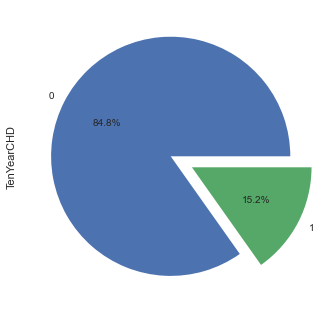

In [390]:
data.TenYearCHD.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%');

seems that 15% people have 10-year risk of future coronary heart disease.This also tells that the data is skewed.

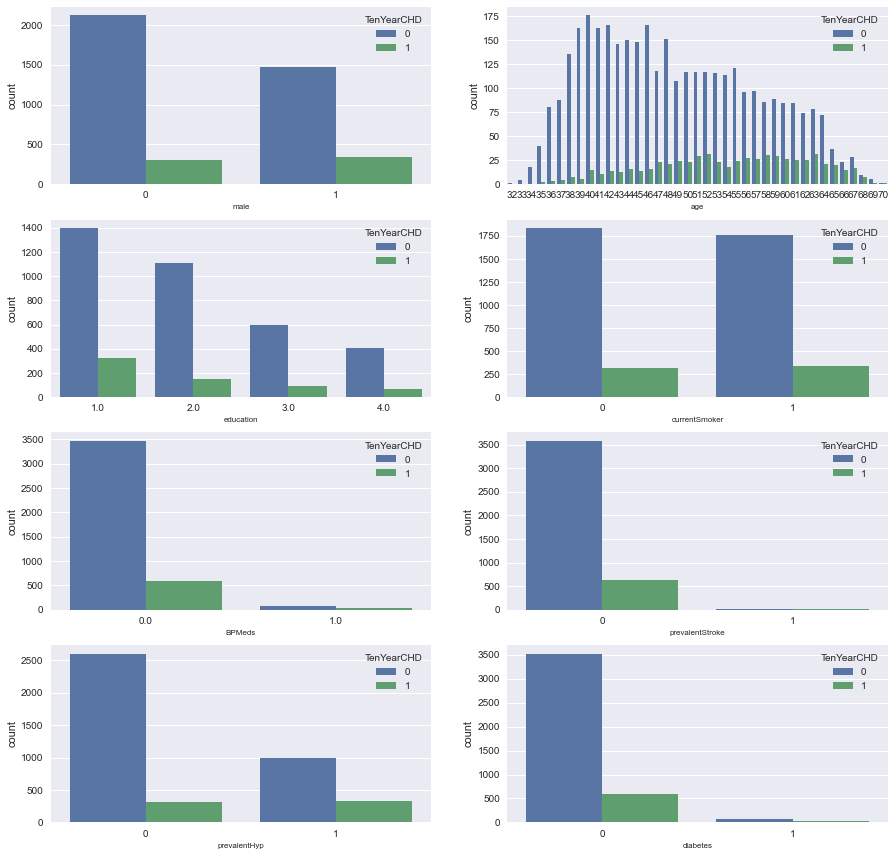

In [391]:
plt.figure(figsize=(15,15))
number=1
#da.astype(object)
for column in data[['male','age','education','currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes']]:
    if number<9:
        ax=plt.subplot(4,2,number)
        sns.countplot(column,hue=data.TenYearCHD,data=data)
        plt.xlabel(column,fontsize=8)
        number+=1
plt.show()

- 1 - There seems to be a slighlty higher risk if its a male.
- 2 - Increasing risk with increase in age. 
- 3 - The more educated people are the lower their risk. Makes sense as they have more knowledge on how to take care of themselves.
- 4 - Risk is the same for both smoker and non-smoker
- 5 - People taking BPMeds have a higher risk.
- 6 - People that have had a stroke are at greater risk.
- 7 - People who are hypertensive are at greater risk.
- 8 - People with diabetes are at a higher risk

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


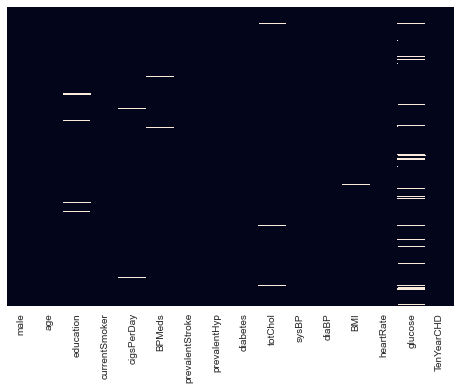

In [393]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False);

In [394]:
data.isna().sum().sort_values(ascending=False).head(7)

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
dtype: int64

Above feature contains missing values before continue analysis we first handle this missing values. All features are quantitative so we replace it using mean or we use SimpleImputer from sklearn.

In [395]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
dataNew=pd.DataFrame(imputer.fit_transform(data))
dataNew.columns=data.columns
dataNew.index=data.index
dataNew

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


In [396]:
dataNew.isna().sum().sort_values(ascending=False)

TenYearCHD         0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
diabetes           0
prevalentHyp       0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
currentSmoker      0
education          0
age                0
male               0
dtype: int64

Great! There is no missing values present in our data.

In [397]:
dataNew.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [398]:
X = dataNew.iloc[:,:-1].values
y = dataNew.iloc[:, -1].values
# we will use robust scaler for scaling as it is less prone to outliers
scale=RobustScaler()
X_scaled=scale.fit_transform(X)



In [401]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
vif


,VIF,Features
0,1.776377,male
1,1.378281,age
2,1.054990,education
3,4.180012,currentSmoker
4,4.115737,cigsPerDay
5,1.133899,BPMeds
6,1.024641,prevalentStroke
7,2.482943,prevalentHyp
8,1.623039,diabetes
9,1.110581,totChol


No severe multicollinearity present is data

In [402]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X_scaled, y)
print(X.shape, y.shape)

#reshaping
y = y.reshape(len(y), 1)
print(X.shape, y.shape)


(7188, 15) (7188,)
(7188, 15) (7188, 1)


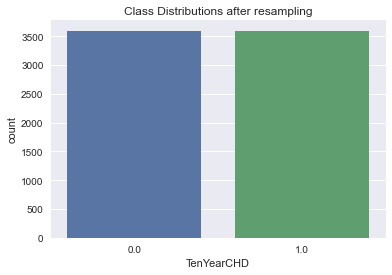

In [403]:
#Viewing class distribution after resampling
Class = {'TenYearCHD' : y[:,0]}
df = pd.DataFrame(Class)

plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling');

Data successfully resampled and balanced

In [404]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=0)


# Logistic Model Training

In [405]:
classifier=LogisticRegression()
y_train=y_train.reshape(len(y_train))
classifier.fit(X_train,y_train)

LogisticRegression()

In [406]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score,roc_curve
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       364
         1.0       0.68      0.67      0.68       355

    accuracy                           0.68       719
   macro avg       0.68      0.68      0.68       719
weighted avg       0.68      0.68      0.68       719



In [337]:
y_pred=classifier.predict(X_train)
accuracy_score(y_train,y_pred)

0.6761477817282424

In [344]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()
y_train = y_train.reshape(len(y_train))
classifier1.fit(X_train, y_train)

RandomForestClassifier()

In [345]:
y_pred = classifier1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       364
         1.0       0.88      0.90      0.89       355

    accuracy                           0.89       719
   macro avg       0.89      0.89      0.89       719
weighted avg       0.89      0.89      0.89       719



In [347]:
y_pred=classifier1.predict(X_train)
accuracy_score(y_train,y_pred)

1.0

In [348]:
pred_prob1 = classifier.predict_proba(X_test)
pred_prob2 = classifier1.predict_proba(X_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

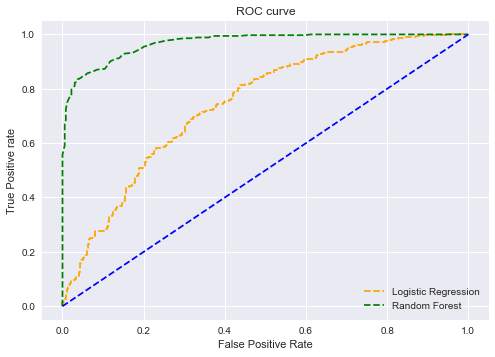

In [350]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Our accuracy of model for both logistic and Random Forest is 68% and 89% respectively. AUC is also high for Random Forest.
Random Forest work better on our dataset.